<a href="https://colab.research.google.com/github/hebayy/SOC-estimation-of-lithium-ion-batteries/blob/master/SDP2_code_Heba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Reading data file (csv)

# data is a dataframe (contains strings)
# newdata is a list (contains floats)
# data_np is a numpy array

data = pd.read_csv("40deg_HWFET.csv")
data = data.sample(frac=1,random_state=4) # shuffle rows, to make sure of balance when splitting dataset 
# Changing string into float with 2 decimal points
newdata = [] 
data_np = data.to_numpy() # converting dataframe into np array
for column in data_np:
    newdata.append( [round(float(xx), 2) for xx in column] )

newdata = np.array(newdata)

# Scatter plot
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(newdata[:,4], newdata[:,0])
ax.set_ylabel('Voltage')
ax.set_xlabel('SOC')
plt.show() 

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


FileNotFoundError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data['Capacity'].plot(kind='box')

# Removing outliers
q75, q25 = np.percentile(newdata[:,4], [75 ,25])
iqr = q75 - q25
max = q75+(1.5*iqr)
min = q25-(1.5*iqr)
for x in newdata[:,4]:
    if (x < min or x > max): 
        newdata[x,:] = np.nan


In [ ]:
# Normalizing the data (feature scaling)
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
newdata = scaler.fit_transform(newdata)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(newdata[:,4])
plt.ylabel('Frequency')
plt.xlabel('Capacity')

In [ ]:
# Splitting input X, output y
from sklearn.model_selection import train_test_split

X,y = np.hsplit(newdata, [4])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [ ]:
# from sklearn.datasets import make_regression
# from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_regression
# from matplotlib import pyplot
 
# # feature selection
# def select_features(X_train, y_train, X_test):
#   # configure to select all features
#   fs = SelectKBest(score_func=f_regression, k='all')
#   # learn relationship from training data
#   fs.fit(X_train, y_train)
#   # transform train input data
#   X_train_fs = fs.transform(X_train)
#   # transform test input data
#   X_test_fs = fs.transform(X_test)
#   return X_train_fs, X_test_fs, fs
 
# # feature selection
# X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# # what are scores for the features
# for i in range(len(fs.scores_)):
#   print('Feature %d: %f' % (i, fs.scores_[i]))
# # plot the scores
# pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
# pyplot.show()

In [ ]:
# # Sampling
# # SMOTER and SMOGN
# # Regression over imbalanced data is not well explored, there are scarce mature or suitable strategies to address it in the context of regression

# ## install pypi release
# pip install smogn

# ## install developer version
# pip install git+https://github.com/nickkunz/smogn.git

# ## load libraries
# import smogn
# import pandas

# ## load data
# housing = pandas.read_csv(
    
#     ## http://jse.amstat.org/v19n3/decock.pdf
#     "https://raw.githubusercontent.com/nickkunz/smogn/master/data/housing.csv"
# )

# ## conduct smogn
# housing_smogn = smogn.smoter(
    
#     data = housing, 
#     y = "SalePrice"
# )

###https://github.com/nickkunz/smogn

In [ ]:
# # calculate the spearman's correlation between two variables
# from numpy.random import rand
# from numpy.random import seed
# from scipy.stats import spearmanr
# # seed random number generator
# seed(1)
# # prepare data
# data1 = rand(1000) * 20
# data2 = data1 + (rand(1000) * 10)
# # calculate spearman's correlation
# coef, p = spearmanr(data1, data2)
# print('Spearmans correlation coefficient: %.3f' % coef)
# # interpret the significance
# alpha = 0.05
# if p > alpha:
# 	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
# else:
# 	print('Samples are correlated (reject H0) p=%.3f' % p)

In [ ]:
 # Multiple Linear Regression
from sklearn.linear_model import LinearRegression
MLR = LinearRegression()  
MLR.fit(X_train, y_train) # inputs and output after splitting and preprocessing
y_predMLR = MLR.predict(X_test)
# # Evaluate the model (intercept and slope)
# print(MLR.intercept_)
# print(MLR.coef_)

# Random forest
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
y_predRF = RF.predict(X_test) 

# SVR
from sklearn.svm import SVR
SVR = SVR(kernel = 'rbf')
SVR.fit(X_train, y_train.ravel())
y_predSVR = SVR.predict(X_test)

# Decision tree
# from sklearn.tree import DecisionTreeRegressor
# DT = DecisionTreeRegressor(max_depth=2)
# DT.fit(X, y)
# # Predict
# X_test = np.arange(0.0, 5.0, 1)[:, np.newaxis]
# result = DT.predict(X_test)

# MAPE metric 
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100


from sklearn import metrics
# MLR results
report = {
    "MLR MAE": metrics.mean_absolute_error(y_test, y_predMLR), 
    "MLR RMSE": np.sqrt(metrics.mean_squared_error(y_test, y_predMLR)),
    "MLR MAPE": np.sqrt(mean_absolute_percentage_error(y_test, y_predMLR)),

    "RF MAE": metrics.mean_absolute_error(y_test, y_predRF), 
    "RF RMSE": np.sqrt(metrics.mean_squared_error(y_test, y_predRF)),
    "RF MAPE": np.sqrt(mean_absolute_percentage_error(y_test, y_predRF)),

    "SVR MAE": metrics.mean_absolute_error(y_test, y_predSVR), 
    "SVR RMSE": np.sqrt(metrics.mean_squared_error(y_test, y_predSVR)),
    "SVR MAPE": np.sqrt(mean_absolute_percentage_error(y_test, y_predSVR)),
    }
    
report = pd.DataFrame([report])
report.to_csv("HWFET_0deg_report.csv", index=False)

# print('MLR MAE:', metrics.mean_absolute_error(y_test, y_predMLR))   
# print('MLR RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predMLR)))
# print('MLR MAPE:', np.sqrt(mean_absolute_percentage_error(y_test, y_predMLR)))

# print('RF MAE:', metrics.mean_absolute_error(y_test, y_predRF))    
# print('RF RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predRF)))
# print('RF MAPE:', np.sqrt(mean_absolute_percentage_error(y_test, y_predRF)))


# print('SVR MAE:', metrics.mean_absolute_error(y_test, y_predSVR))  
# print('SVR RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predSVR)))
# print('SVR MAPE:', np.sqrt(mean_absolute_percentage_error(y_test, y_predSVR)))



C:\Users\lenovo\AppData\Local\Temp\ipykernel_19604\2939940369.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)


In [ ]:
# report = pd.DataFrame([report])
# report.to_csv("report.csv", index=False)

MAE: 0.45387748032738795
MSE: 0.30026466934112983
RMSE: 0.547964113187287
VarScore: 0.036694514178502335


C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

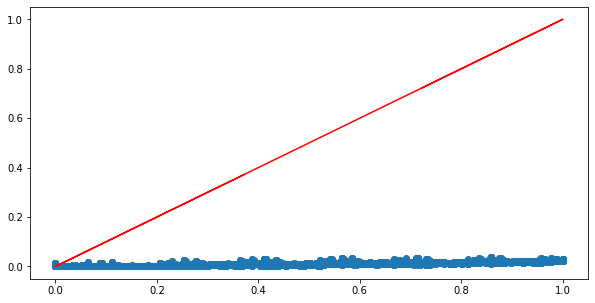

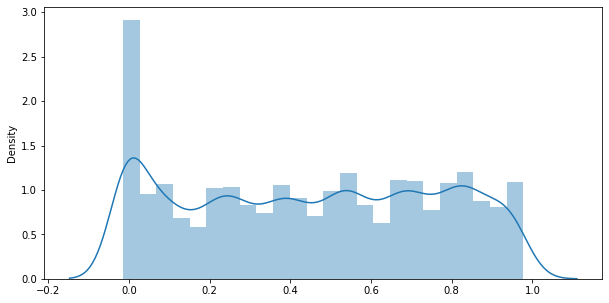

In [ ]:
# #Model 2  Creating a Neural Network Model
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation
# from tensorflow.keras.optimizers import Adam

# # having 5 neuron is based on the number of available features
# model = Sequential()
# model.add(Dense(5,activation='relu'))
# model.add(Dense(5,activation='relu'))
# model.add(Dense(5,activation='relu'))
# model.add(Dense(5,activation='relu'))
# model.add(Dense(1))
# model.compile(optimizer='Adam',loss='mes')

# y_predMLP = model.predict(X_test)
# from sklearn import metrics
# print('MAE:', metrics.mean_absolute_error(y_test, y_predMLP))  
# print('MSE:', metrics.mean_squared_error(y_test, y_predMLP))  
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predMLP)))
# print('VarScore:',metrics.explained_variance_score(y_test,y_predMLP))
# # Visualizing Our predictions
# fig = plt.figure(figsize=(10,5))
# plt.scatter(y_test,y_predMLP)
# # Perfect predictions
# plt.plot(y_test,y_test,'r')

# # visualizing residuals
# fig = plt.figure(figsize=(10,5))
# residuals = (y_test-y_predMLP)
# sns.distplot(residuals)

In [ ]:
# # Random forest with hyperparameter tuning
# from sklearn import datasets
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform, truncnorm, randint

# # Load the model parameters to be test 
# model_params = {
#     # randomly sample numbers from 10 to 500 estimators
#     'n_estimators': randint(10,500),
#     # normally distributed max_features, with mean .5 &sd 0.1, 
#     # between 0 and 1
#     'max_features': truncnorm(a=0, b=1, loc=0.5, scale=0.1),
#     # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
#     'min_samples_split': uniform(0.05, 0.2)
# }

# # create random forest regressor model
# rf_model = RandomForestRegressor()

# # set up random search meta-estimator
# # this will train 100 models over 5 folds of cross validation (500 models total)
# clf = RandomizedSearchCV(rf_model, model_params, n_iter=100, cv=5, random_state=1)

# clf.fit(X_train, y_train.ravel())
# y_predRFtuned = clf.predict(X_test) 
# print('RF MAE:', metrics.mean_absolute_error(y_test, y_predRFtuned))  
# print('RF MSE:', metrics.mean_squared_error(y_test, y_predRFtuned))  
# print('RF RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predRFtuned)))
# print('RF MAPE:', np.sqrt(mean_absolute_percentage_error(y_test, y_predRFtuned)))

RF MAE: 0.015441726924175836
RF MSE: 0.0006006533230572178
RF RMSE: 0.024508229700596854
RF MAPE: 4.504411297598312
